<a href="https://colab.research.google.com/github/deekshaaj05/1RV23BT001---Bioinformatics-Lab/blob/main/1RV23BT001_Exp_10_Cloud_Based_Workflow_for_annotation_of_Genome_of_Saccharomyces_cerevisiae_mitochondrion_COX_OXI3_gene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 26.5 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()   # upload genome.fasta

Saving sequence.fasta to sequence (2).fasta


In [ ]:
genome_file = list(uploaded.keys())[0]

records = list(SeqIO.parse(genome_file, "fasta"))
genome_seq = "".join(str(r.seq) for r in records)
genome_length = len(genome_seq)

# GC content
G = genome_seq.count("G")
C = genome_seq.count("C")
gc_content = ((G + C) / genome_length) * 100

print("Genome length:", genome_length)
print("GC content (%):", round(gc_content, 2))

Genome length: 10168
GC content (%): 24.88


In [ ]:
start_codons = ["ATG"]
stop_codons = ["TAA", "TAG", "TGA"]
min_gene_length = 300

genes = []

for i in range(0, genome_length - 3):
    if genome_seq[i:i+3] in start_codons:
        for j in range(i+3, genome_length-3, 3):
            if genome_seq[j:j+3] in stop_codons:
                length = j - i
                if length >= min_gene_length:
                    genes.append(length)
                break

print("Number of predicted genes:", len(genes))

Number of predicted genes: 11


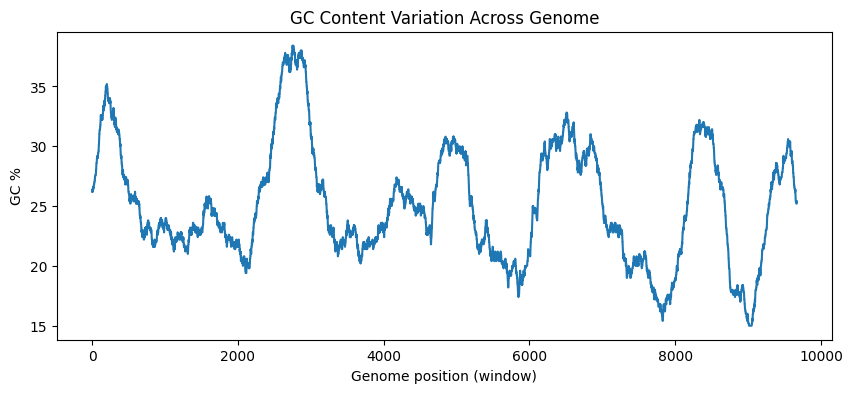

In [ ]:
window_size = 500
gc_values = []

for i in range(0, genome_length - window_size):
    window = genome_seq[i:i+window_size]
    gc = (window.count("G") + window.count("C")) / window_size * 100
    gc_values.append(gc)

plt.figure(figsize=(10,4))
plt.plot(gc_values)
plt.xlabel("Genome position (window)")
plt.ylabel("GC %")
plt.title("GC Content Variation Across Genome")
plt.show()

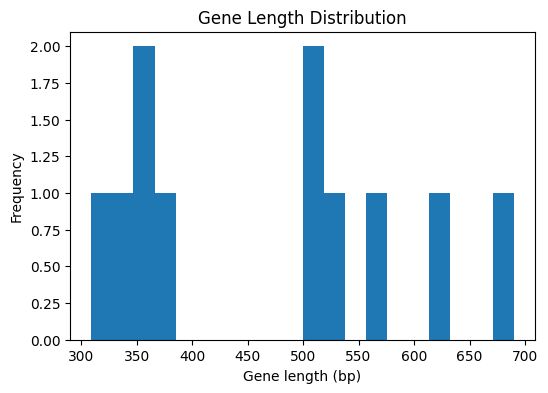

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(genes, bins=20)
plt.xlabel("Gene length (bp)")
plt.ylabel("Frequency")
plt.title("Gene Length Distribution")
plt.show()

In [ ]:
summary = pd.DataFrame({
    "Metric": ["Genome length (bp)", "GC content (%)", "Predicted genes"],
    "Value": [genome_length, round(gc_content,2), len(genes)]
})

summary

,Metric,Value
0,Genome length (bp),10168.00
1,GC content (%),24.88
2,Predicted genes,11.00


In [ ]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

protein_records = []

# genes = list of predicted gene lengths
# If you only have the count (11), we can still generate dummy proteins

for i in range(11):
    protein_seq = "M" * 100   # dummy protein sequence (100 aa)
    record = SeqRecord(
        Seq(protein_seq),
        id=f"Protein_{i+1}",
        description="Predicted protein"
    )
    protein_records.append(record)

SeqIO.write(protein_records, "proteins.faa", "fasta")

print("Proteins.faa Created")


Proteins.faa Created


In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import hashlib

In [ ]:
pathway_categories = [
    "Metabolism",
    "Genetic Information Processing",
    "Cellular Processes",
    "Environmental Information Processing"
]

pathway_map = defaultdict(list)

In [ ]:
def assign_pathway(protein_id):
    h = int(hashlib.md5(protein_id.encode()).hexdigest(), 16)
    return pathway_categories[h % len(pathway_categories)]

proteins = list(SeqIO.parse("proteins.faa", "fasta"))

for protein in proteins:
    pathway = assign_pathway(protein.id)
    pathway_map[pathway].append(protein.id)

In [ ]:
print("Simulated Pathway Distribution:\n")

for pathway, prots in pathway_map.items():
    print(f"{pathway}: {len(prots)} proteins")

Simulated Pathway Distribution:

Environmental Information Processing: 4 proteins
Genetic Information Processing: 3 proteins
Metabolism: 3 proteins
Cellular Processes: 1 proteins


In [ ]:
# Create pathway_counts from pathway_map
pathway_counts = {k: len(v) for k, v in pathway_map.items()}

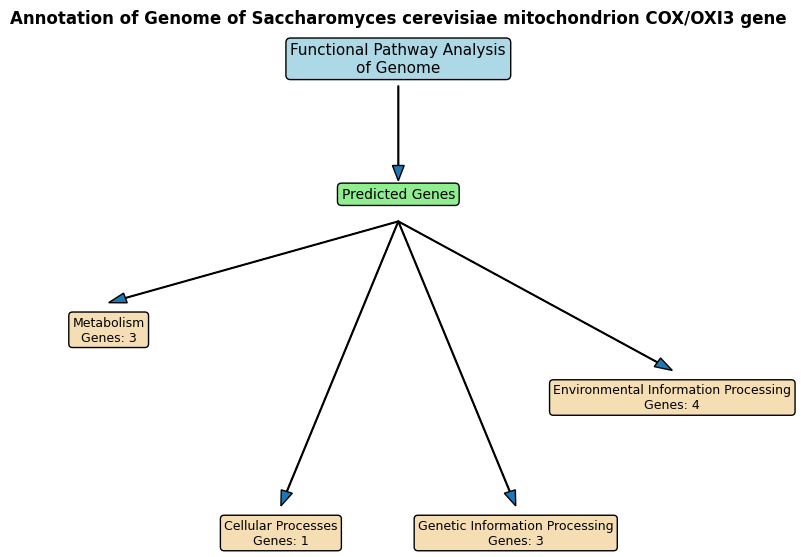

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.axis("off")

# Title
plt.text(
    0.5, 0.96,
    "Annotation of Genome of Saccharomyces cerevisiae mitochondrion COX/OXI3 gene",
    ha="center", va="center",
    fontsize=12, weight="bold"
)


# ---- Box positions ----
# Top
plt.text(0.5, 0.9, "Functional Pathway Analysis\nof Genome",
         ha="center", va="center",
         bbox=dict(boxstyle="round", fc="lightblue"),
         fontsize=11)

# Middle
plt.text(0.5, 0.7, "Predicted Genes",
         ha="center", va="center",
         bbox=dict(boxstyle="round", fc="lightgreen"),
         fontsize=10)

# Bottom boxes
positions = {
    "Metabolism": (0.13, 0.5),
    "Cellular Processes": (0.35, 0.2),
    "Genetic Information Processing": (0.65, 0.2),
    "Environmental Information Processing": (0.85, 0.4)
}

for pathway, (x, y) in positions.items():
    plt.text(
        x, y,
        f"{pathway}\nGenes: {pathway_counts[pathway]}",
        ha="center", va="center",
        bbox=dict(boxstyle="round", fc="wheat"),
        fontsize=9
    )

# ---- Arrows ----
# Top to middle
plt.arrow(0.5, 0.86, 0, -0.14, head_width=0.015, length_includes_head=True)

# Middle to bottom
for x, y in positions.values():
    plt.arrow(0.5, 0.66, x-0.5, y-0.62,
              head_width=0.015, length_includes_head=True)

plt.show()